In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# 1. Preprocessing

## Read file

In [2]:
df = pd.read_csv('../Dataset/breast-cancer.csv')
df.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


## Find missing value

In [3]:
assert df.isna().sum().sum() == 0
assert df.isnull().sum().sum() == 0

### Drop unrelated column

In [4]:
df = df.drop(columns='id')
df_X = df.drop(columns='diagnosis')
df_y = df['diagnosis']

In [5]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Data Exploration

### Amount Vizualizatioon

In [6]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


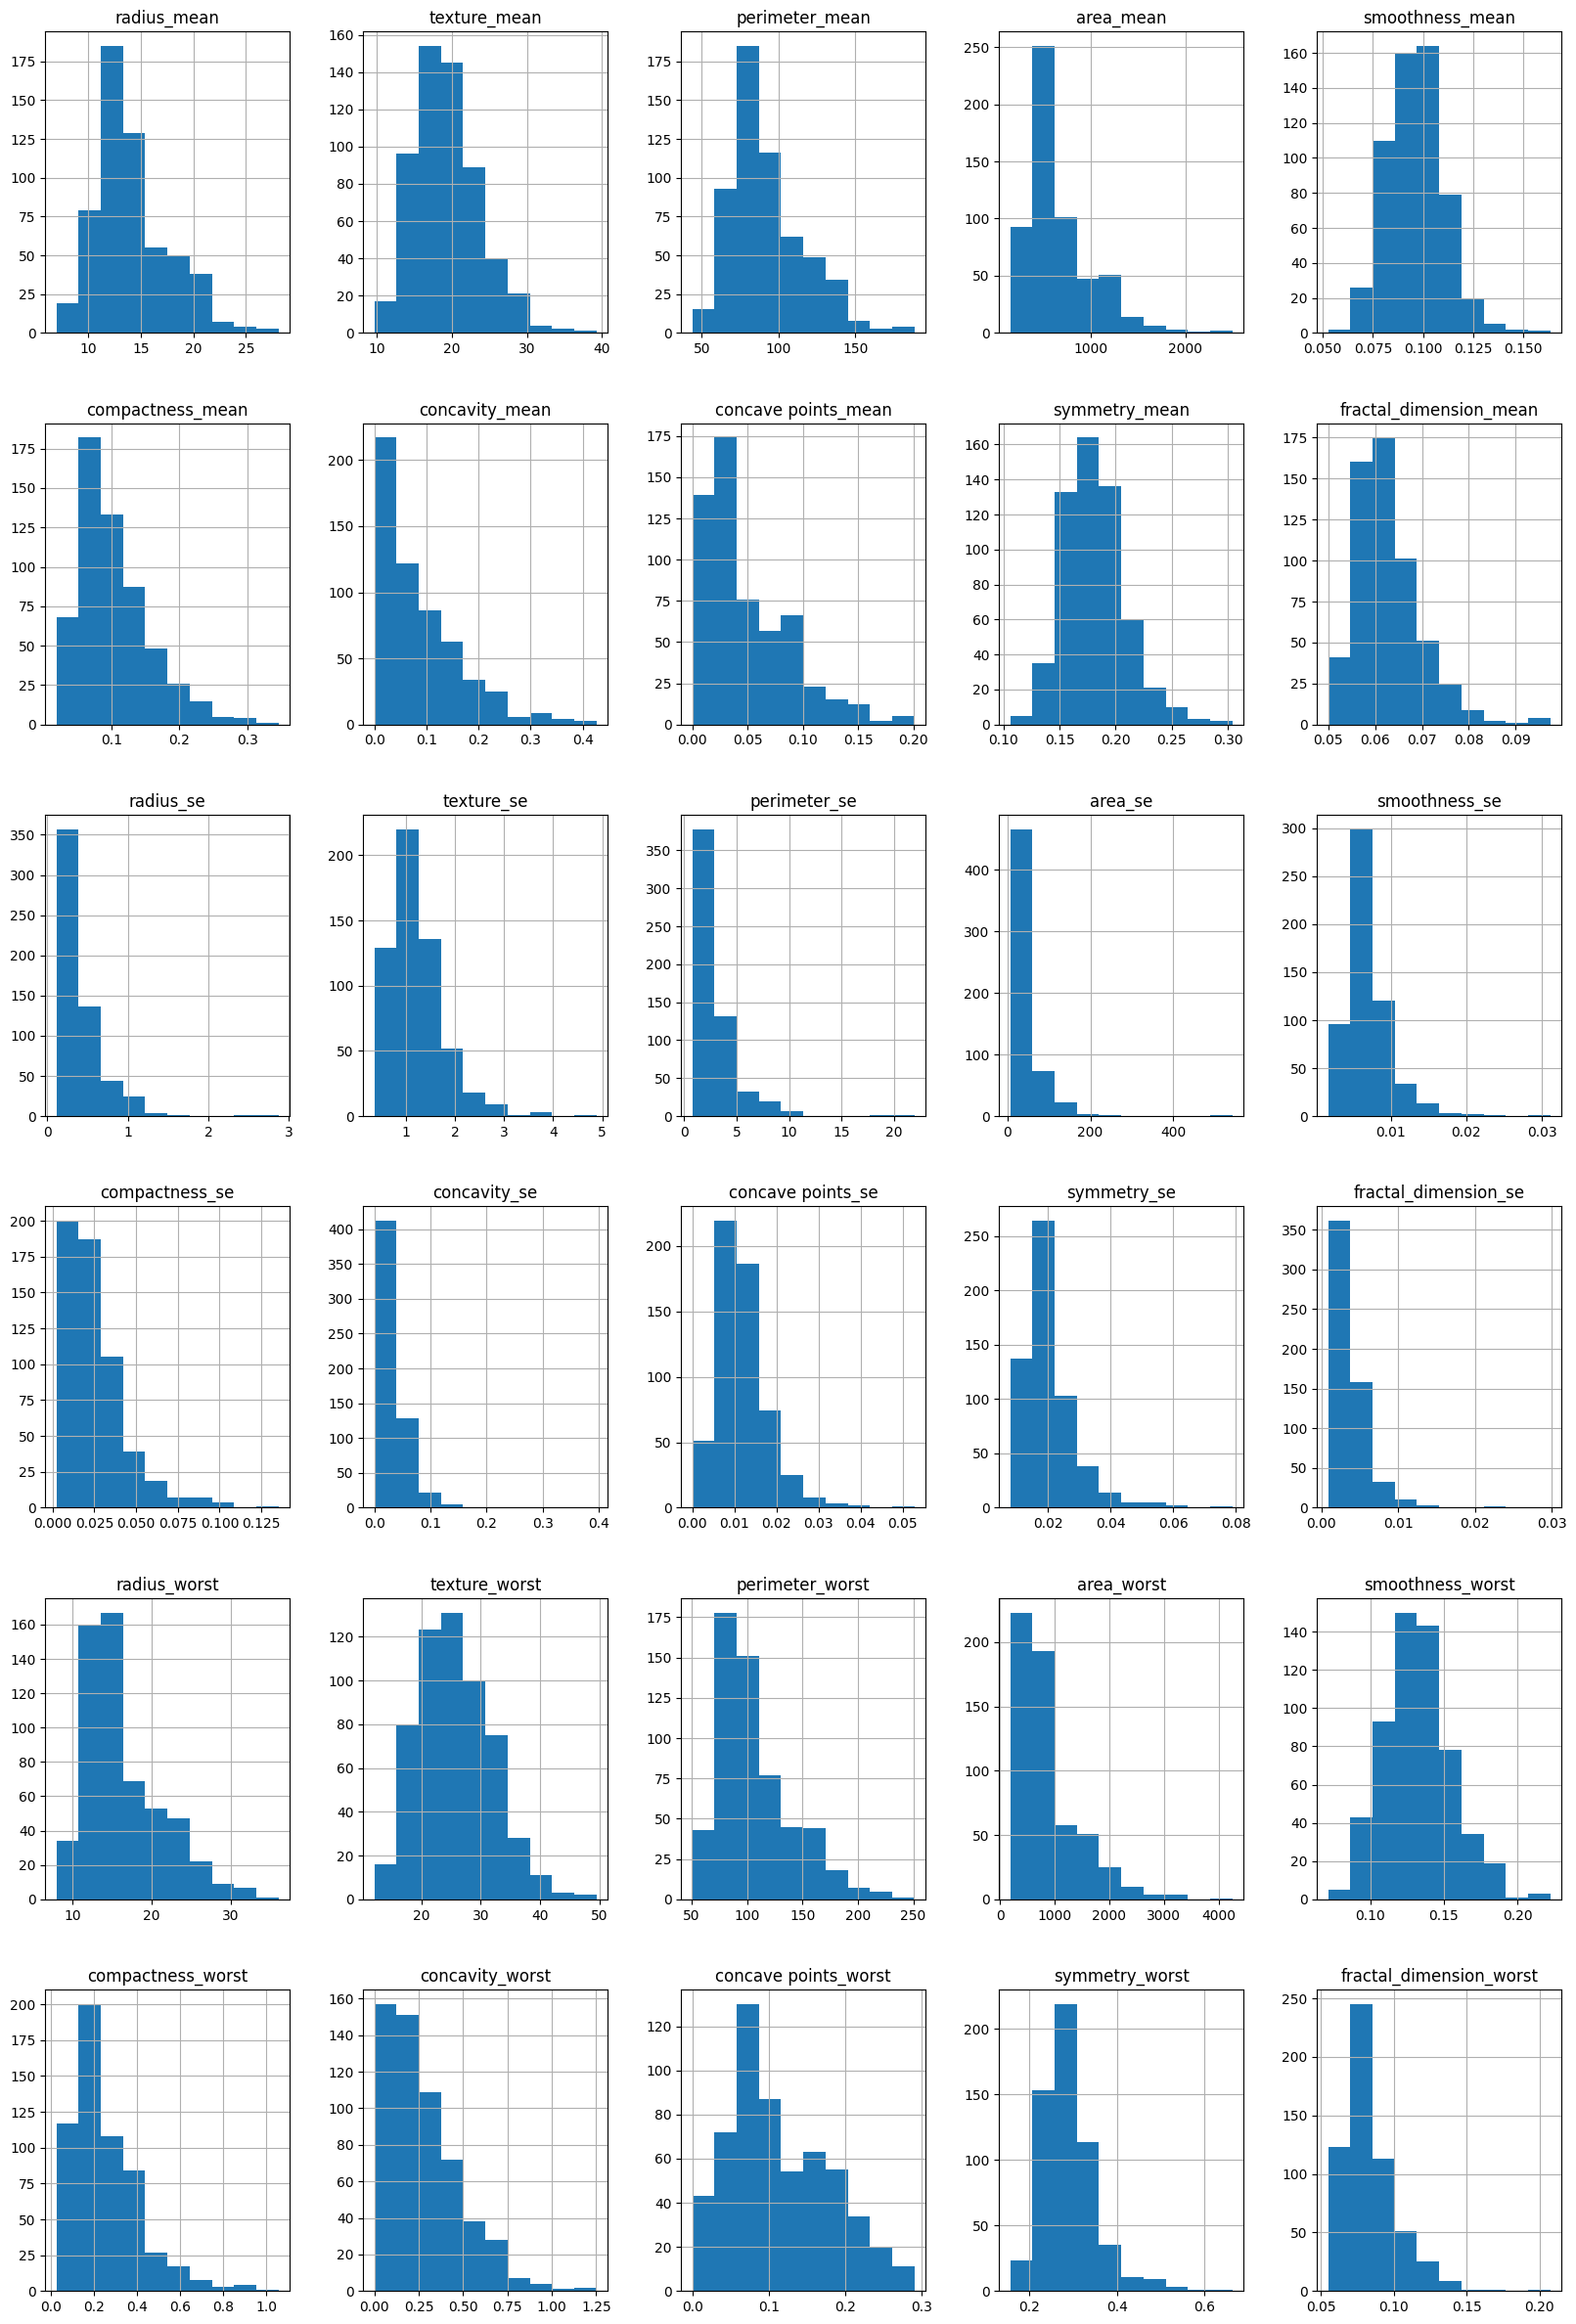

In [7]:
df.hist(figsize=(20,30))
plt.show()

### Proportion Vizualisation

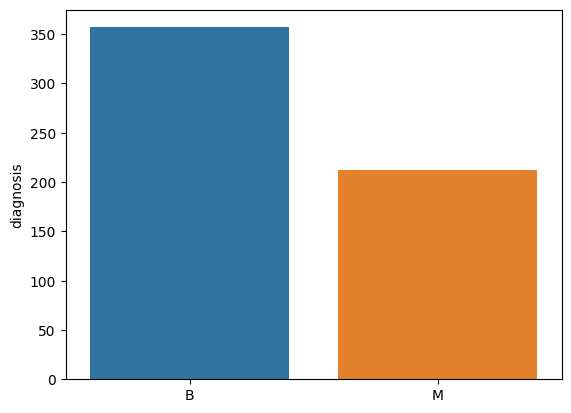

B    0.627417
M    0.372583
Name: ratio, dtype: float64


In [8]:
target = df_y.value_counts().to_frame()
target['ratio'] = target.diagnosis/target.diagnosis.sum()
sns.barplot(data=target,x=target.index,y=target.diagnosis)
plt.show()
print(target.ratio)

The dataset is mild imbalanced

### Distribution Vizualisation

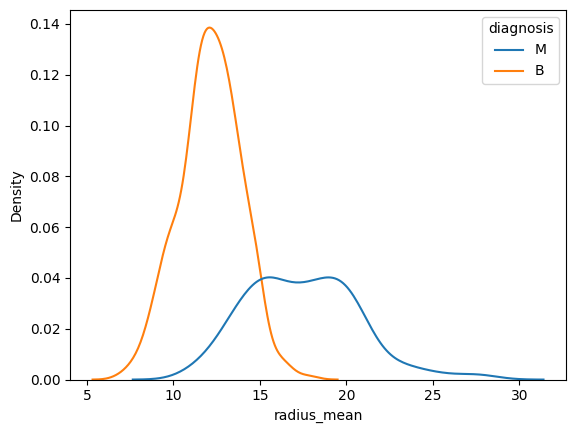

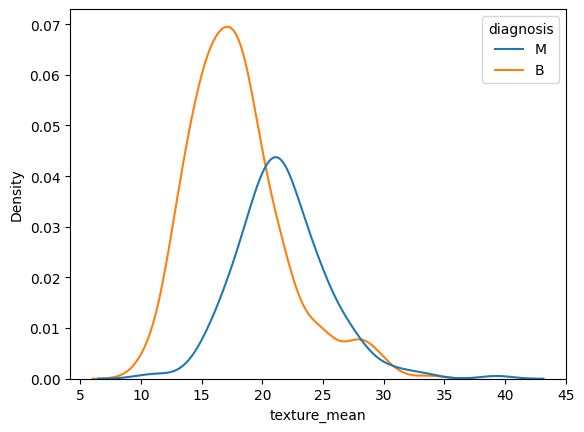

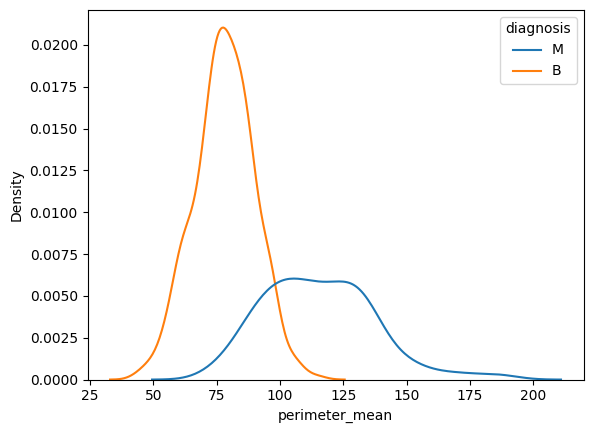

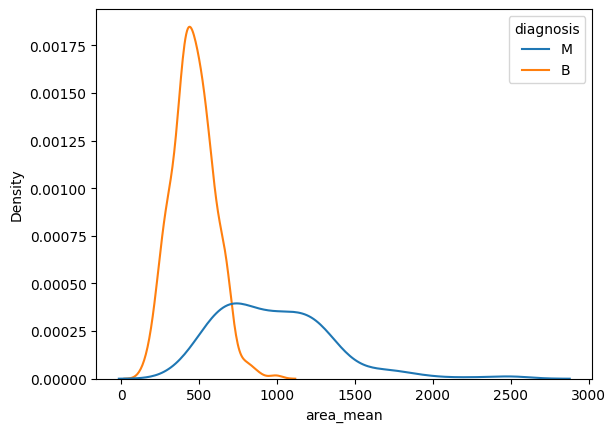

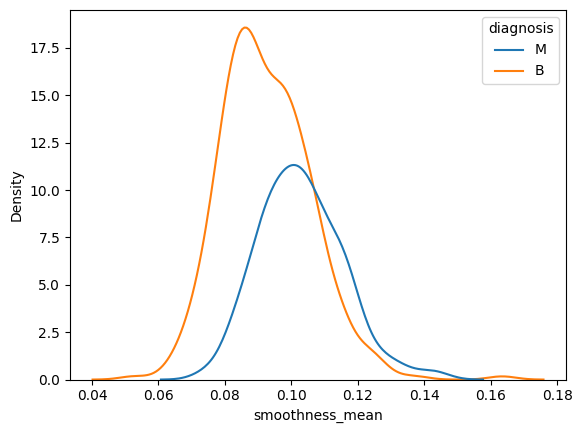

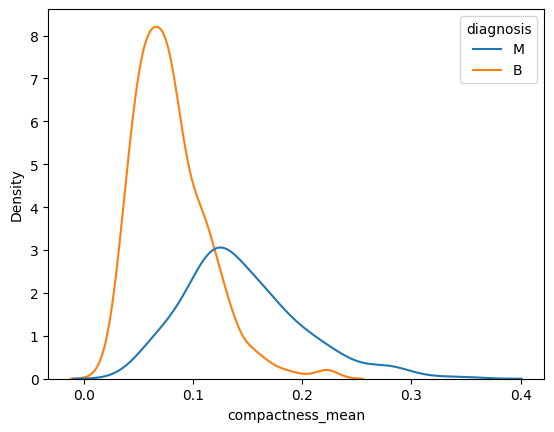

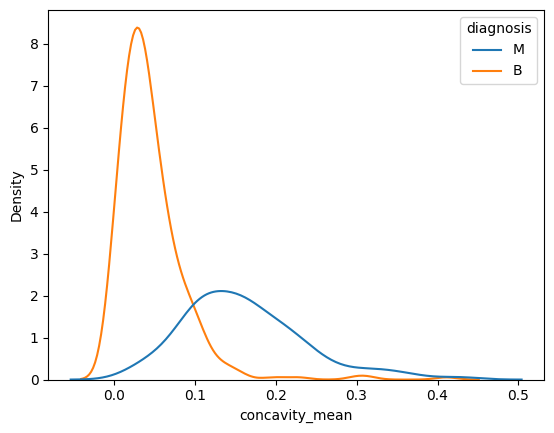

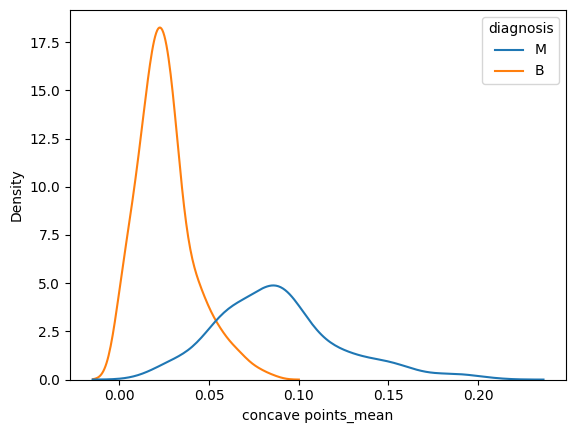

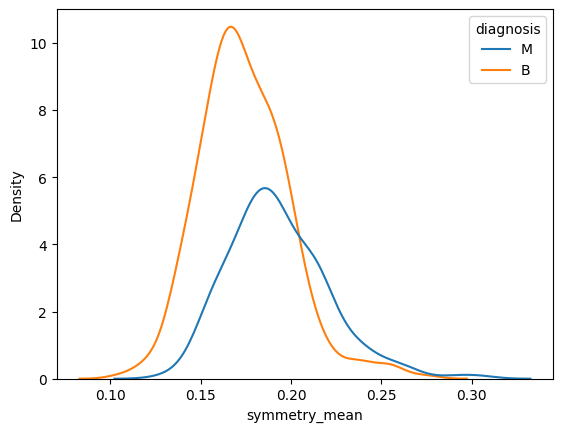

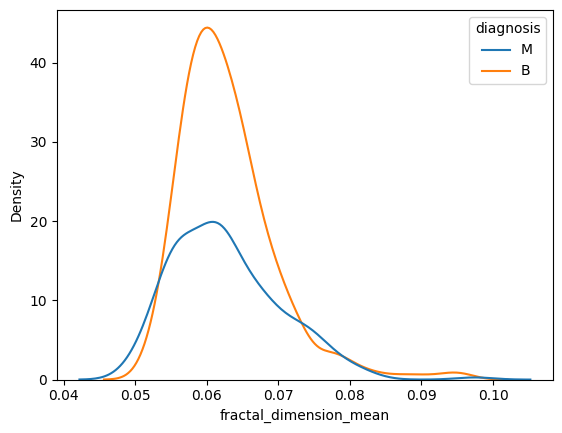

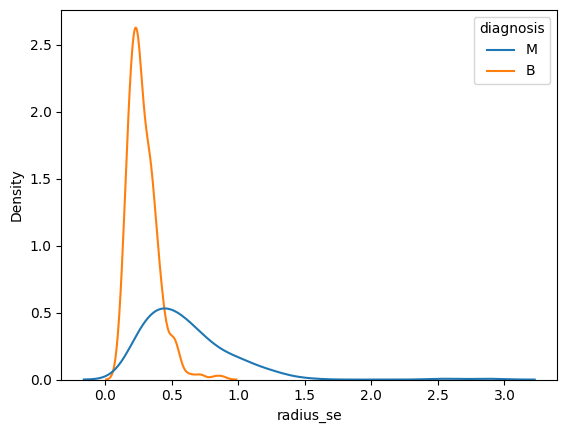

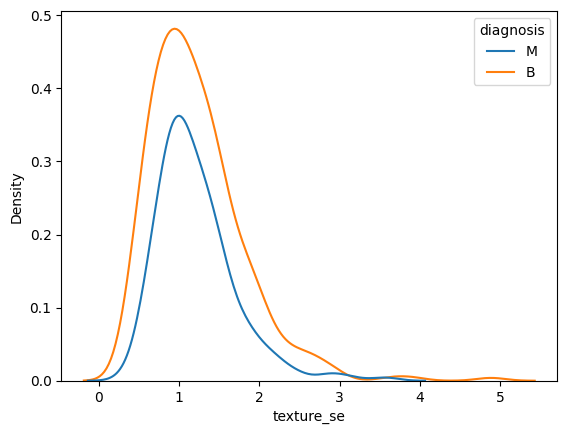

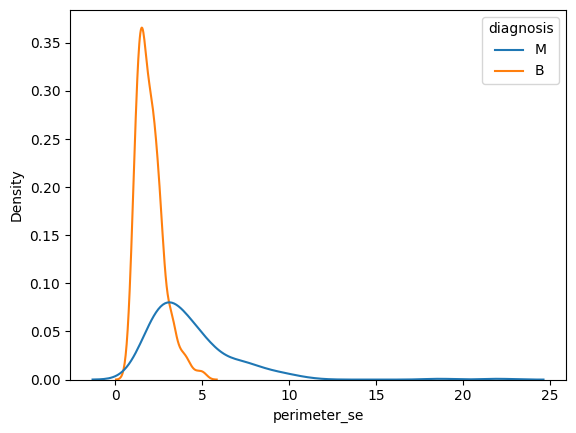

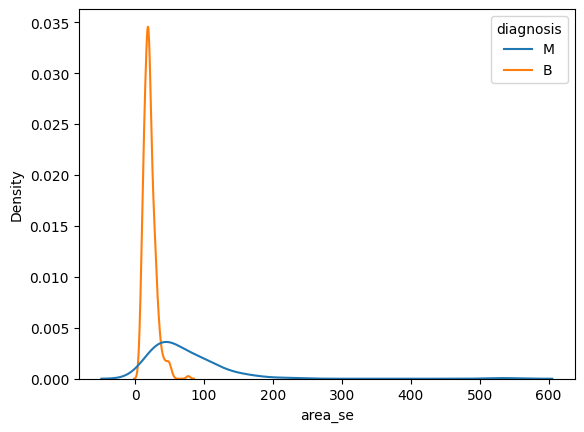

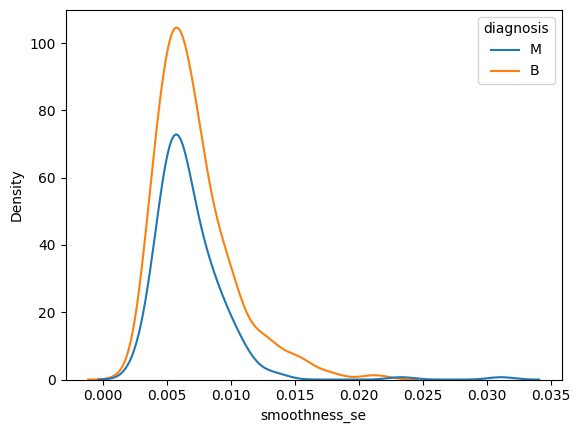

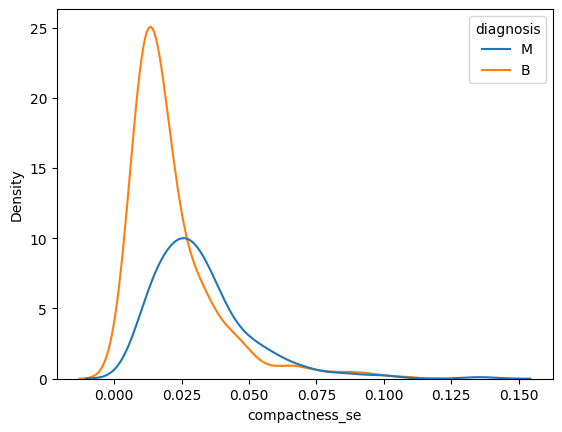

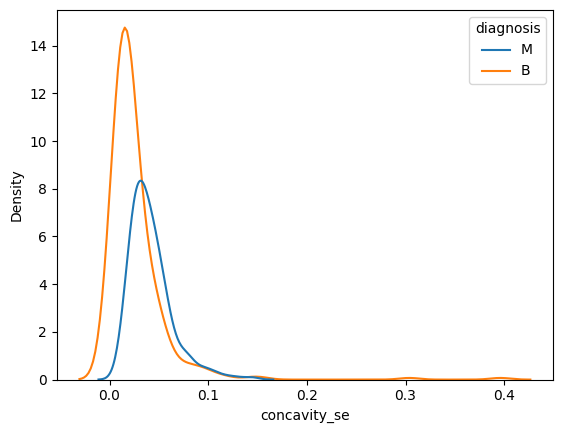

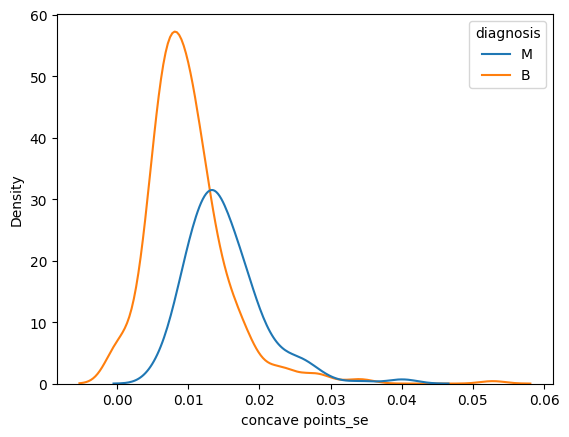

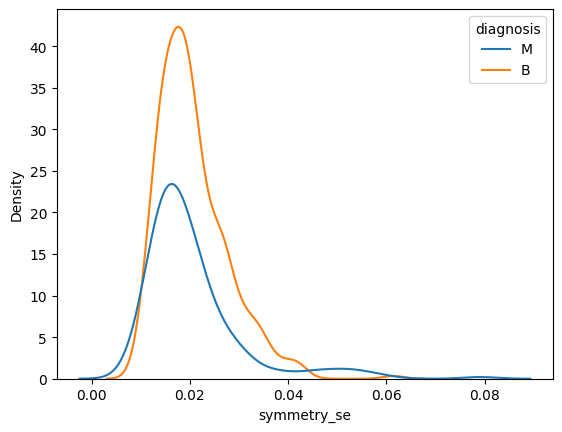

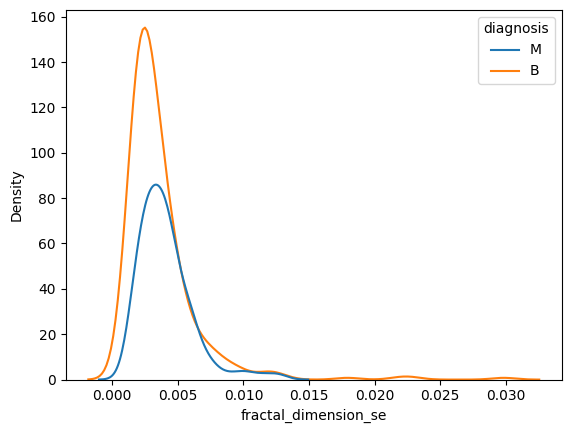

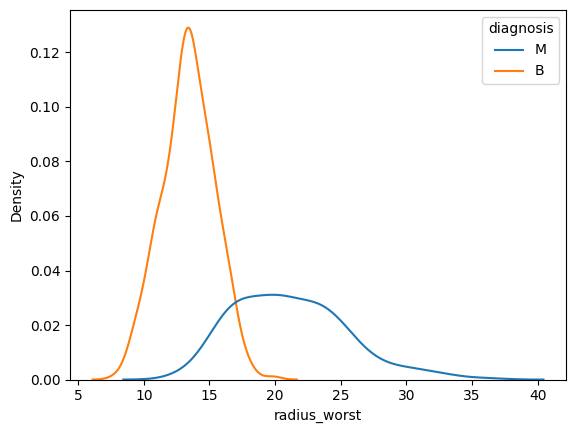

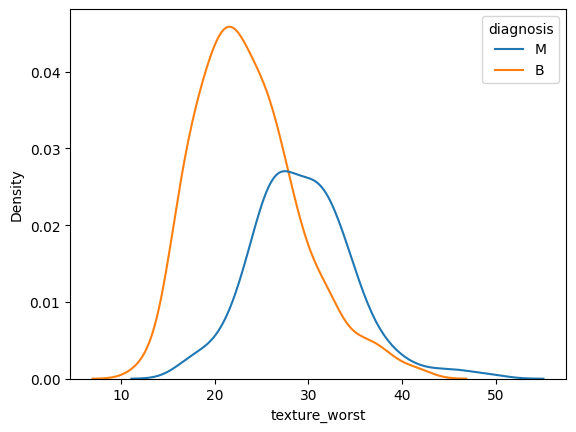

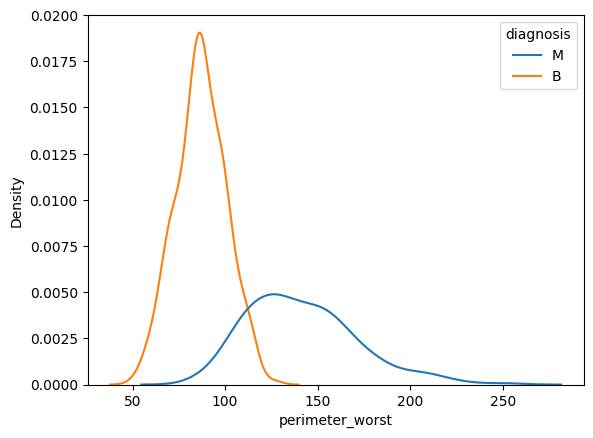

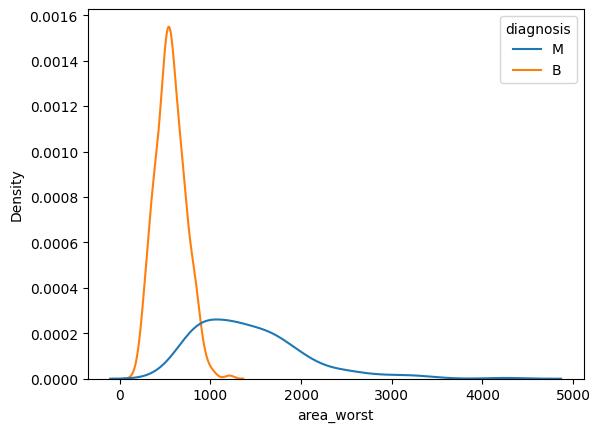

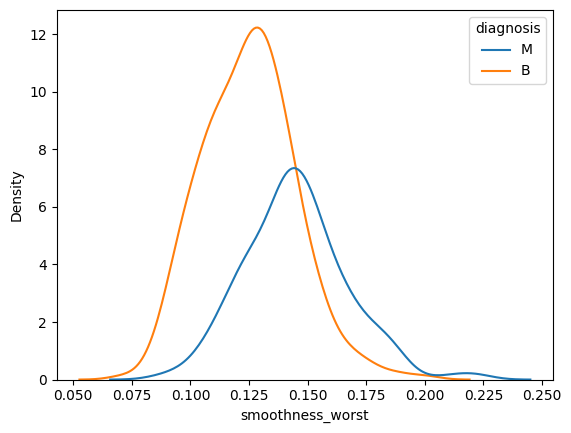

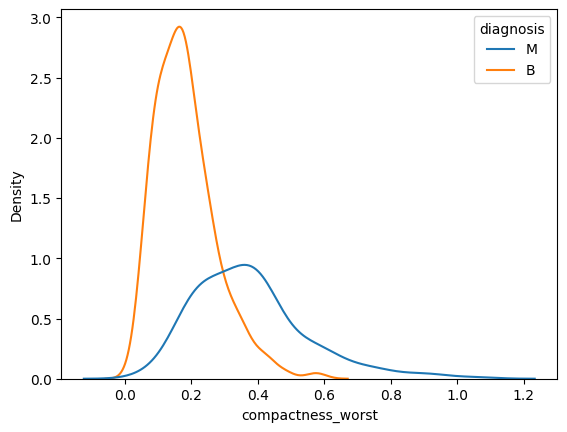

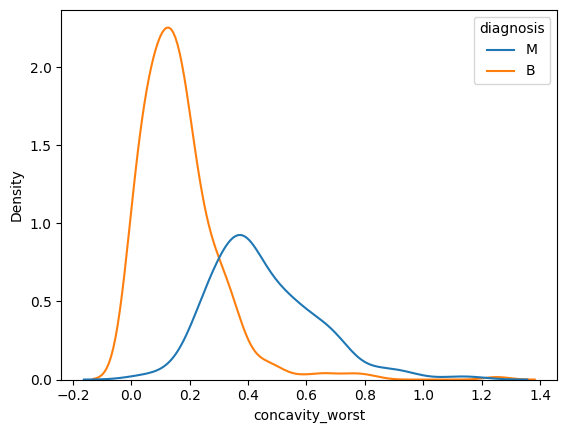

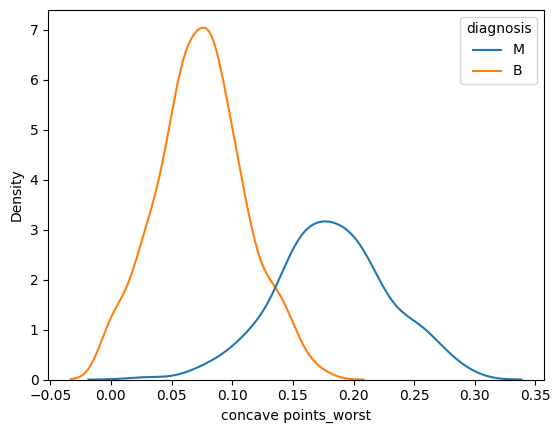

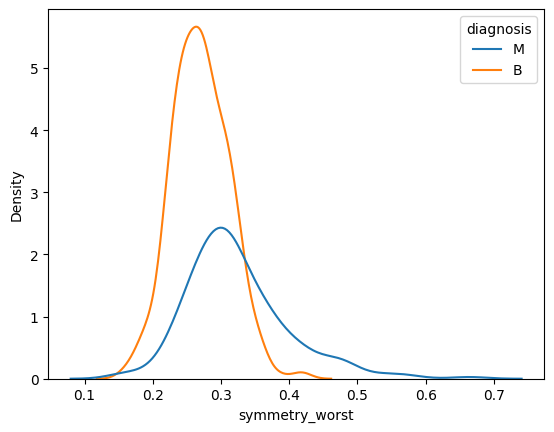

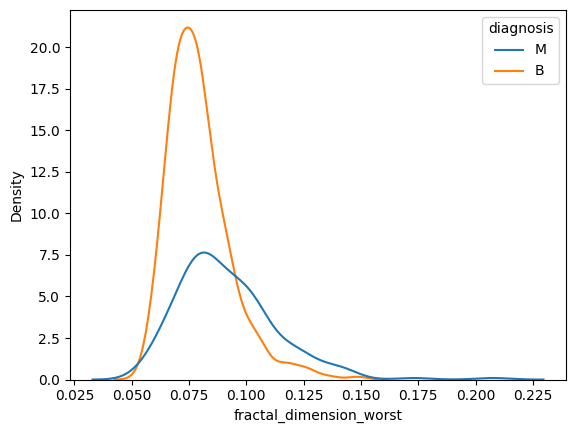

In [9]:

for col in df_X.columns:

    sns.kdeplot(df, x=col, hue="diagnosis")
    plt.show()

We clearly see that the lower the amount of the feature, the more likely the cancer is Malign.
On the other hand, the higher the number, the more likely it will be Benign

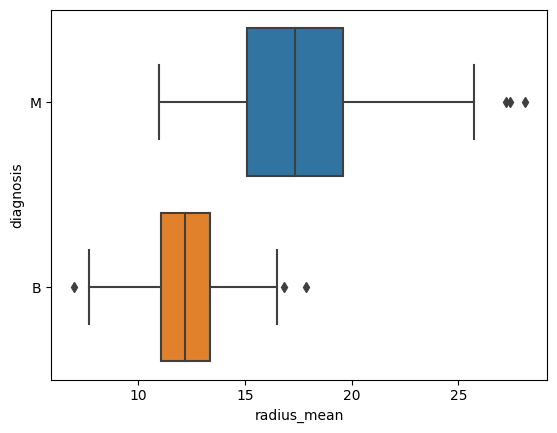

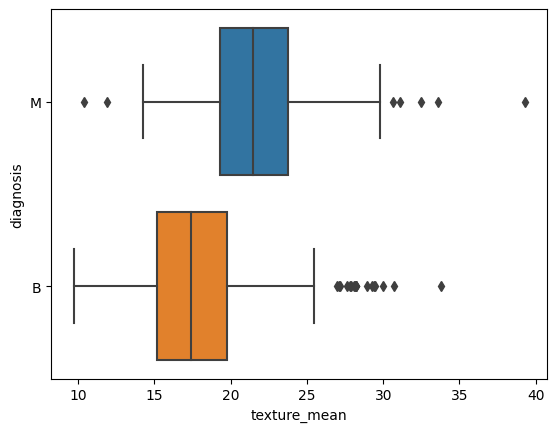

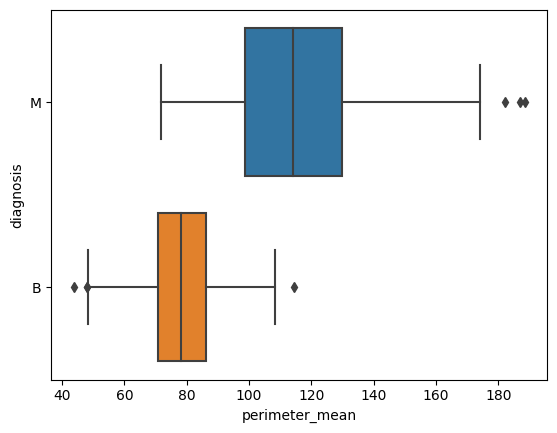

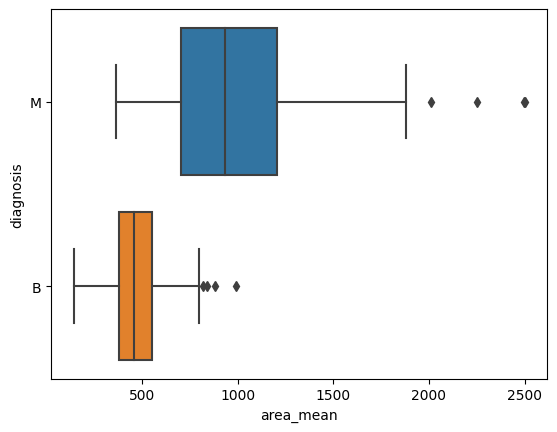

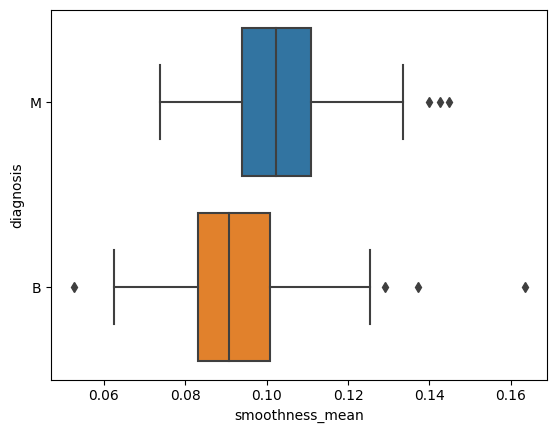

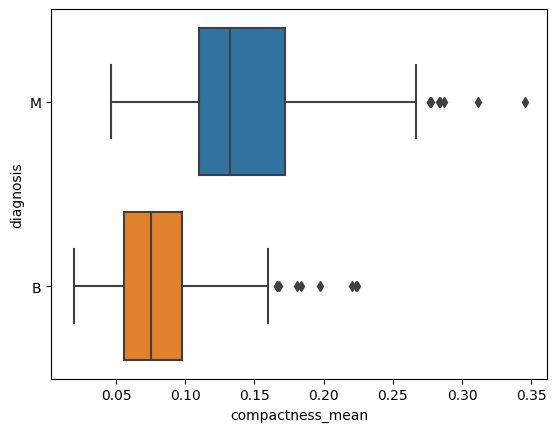

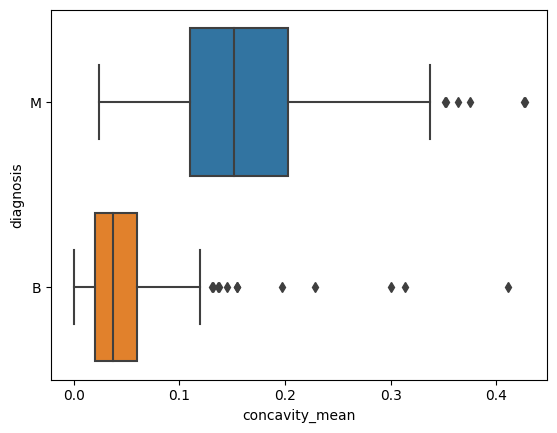

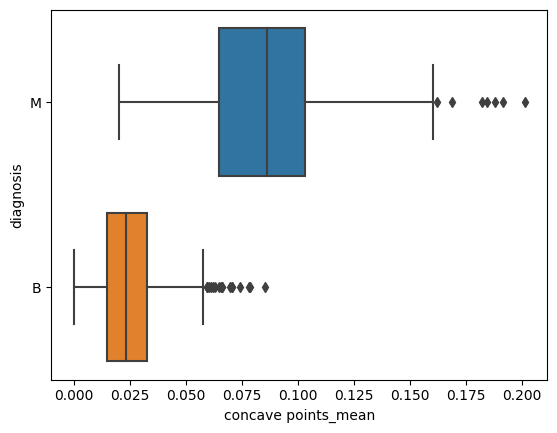

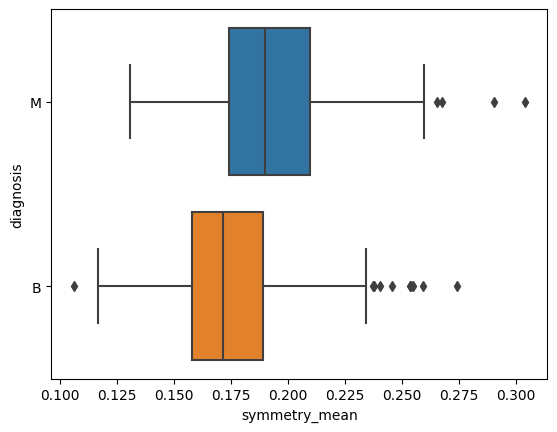

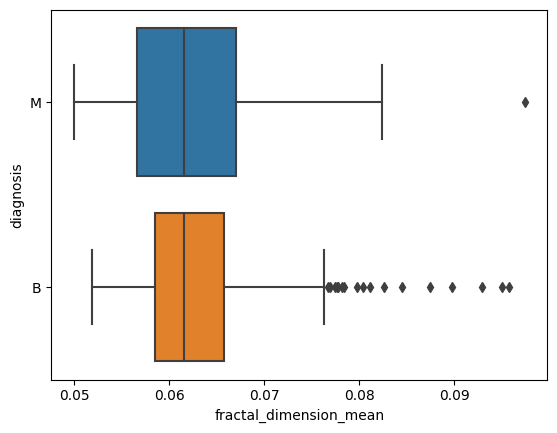

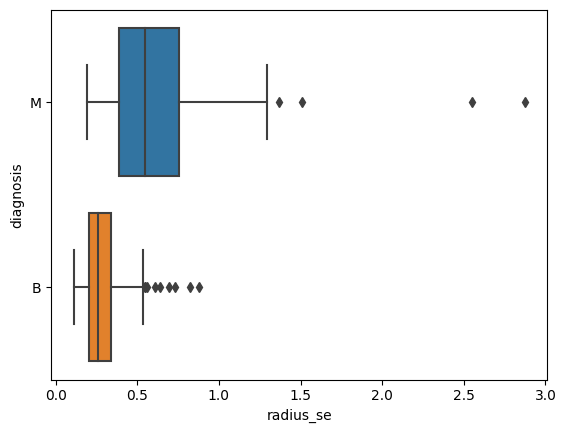

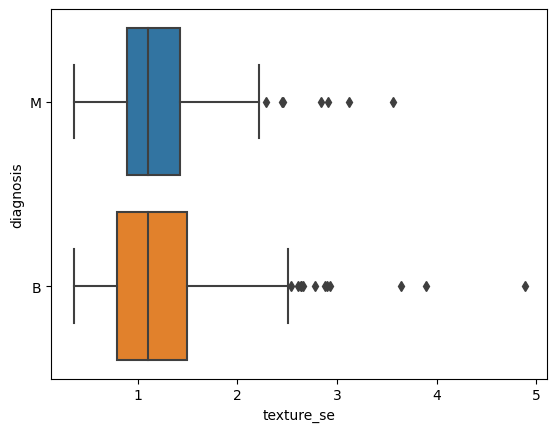

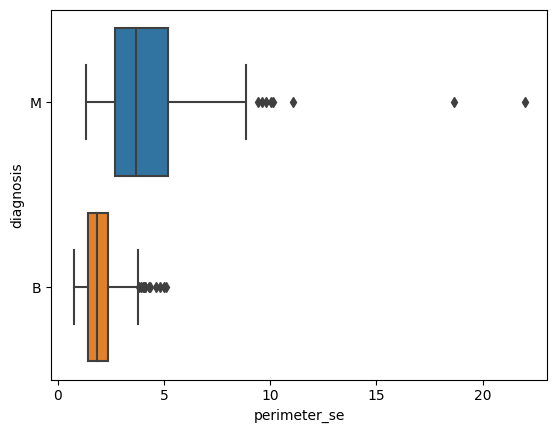

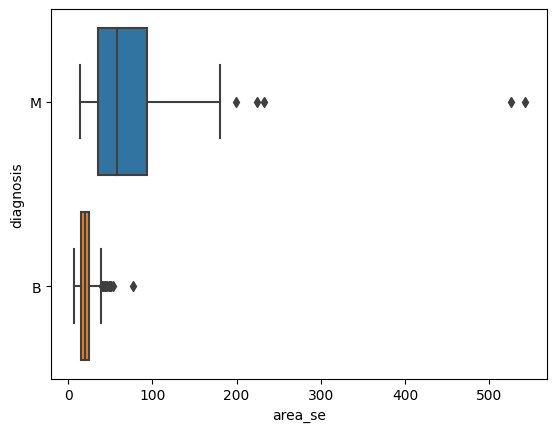

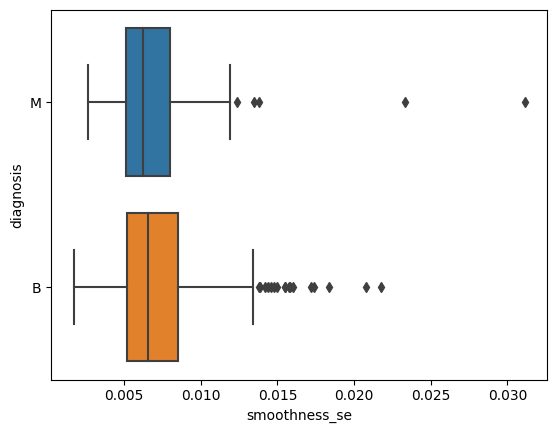

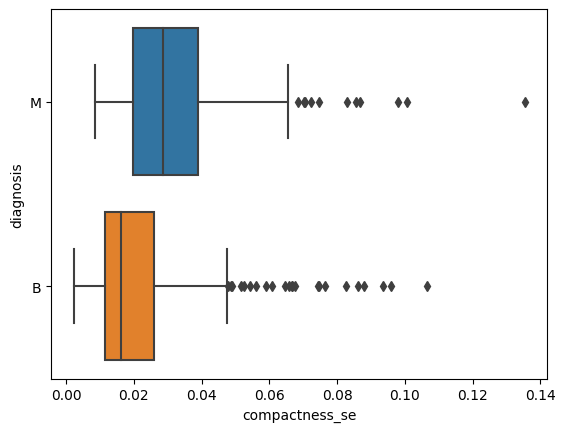

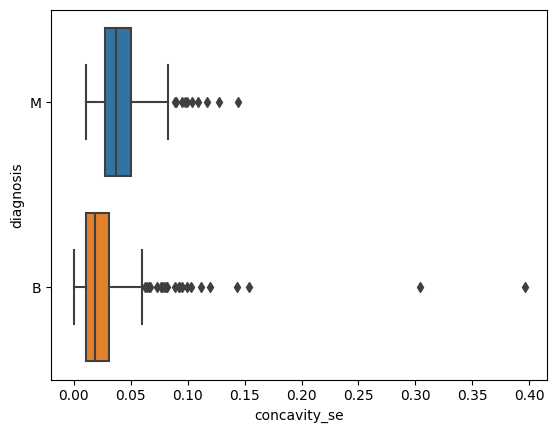

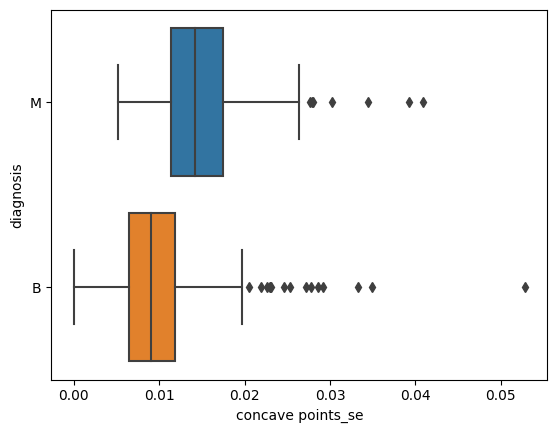

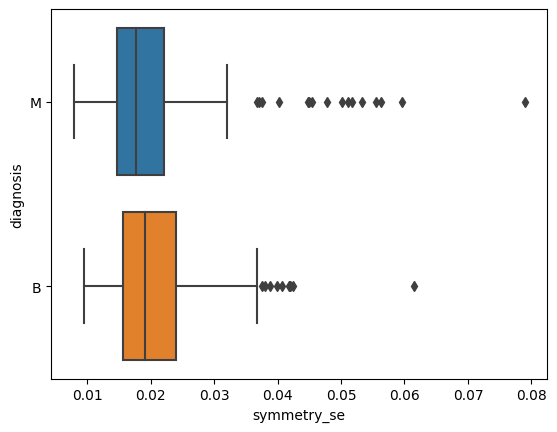

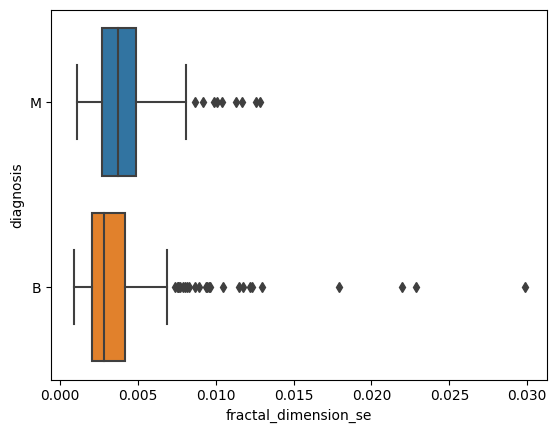

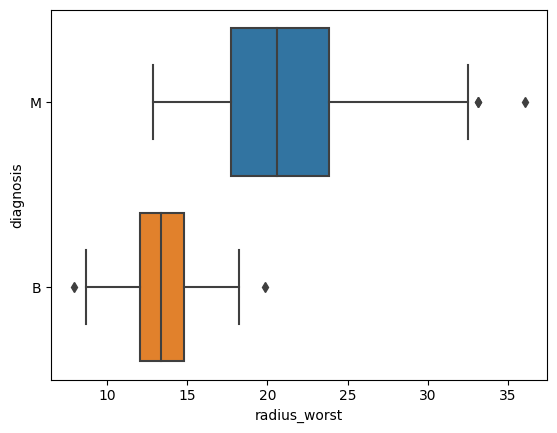

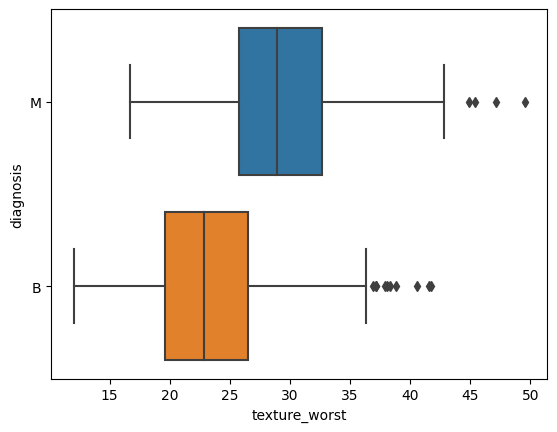

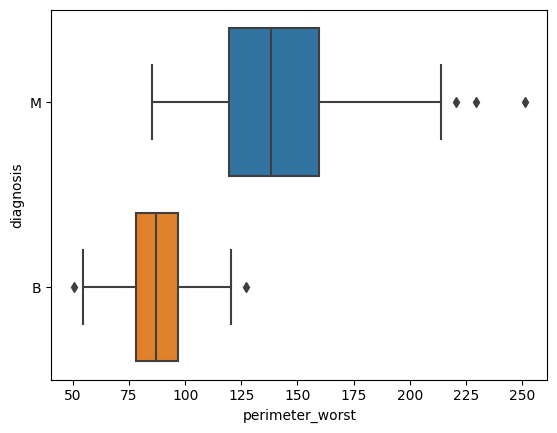

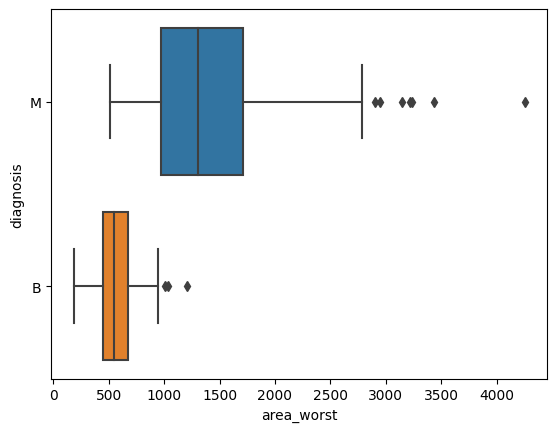

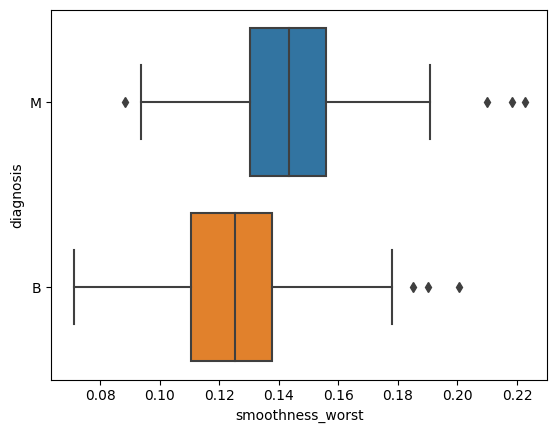

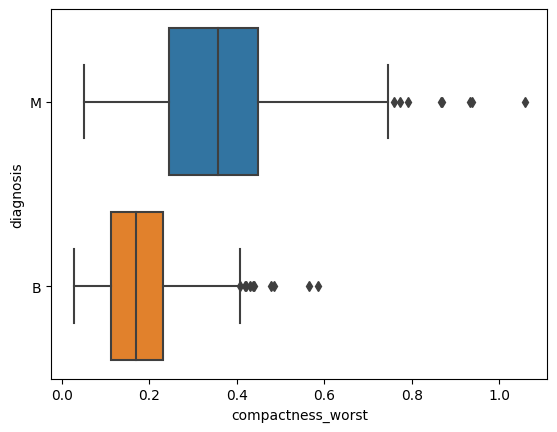

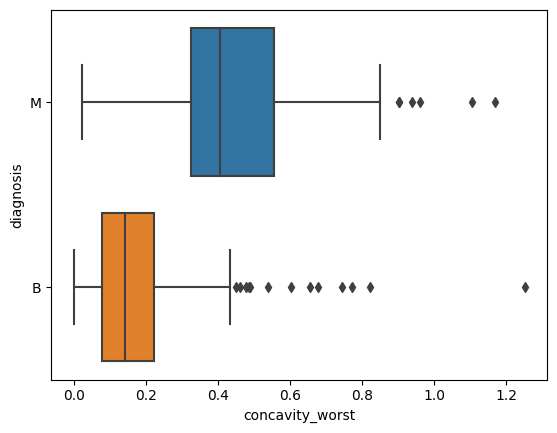

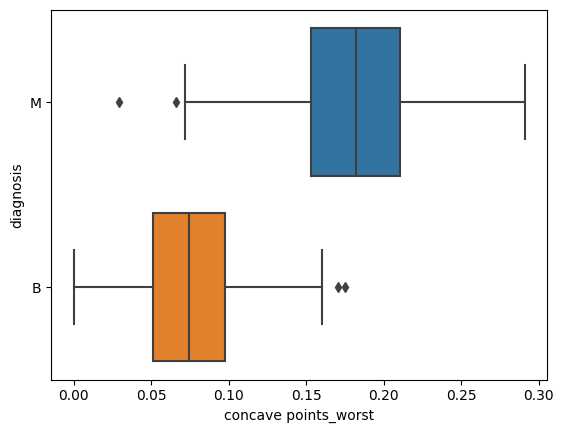

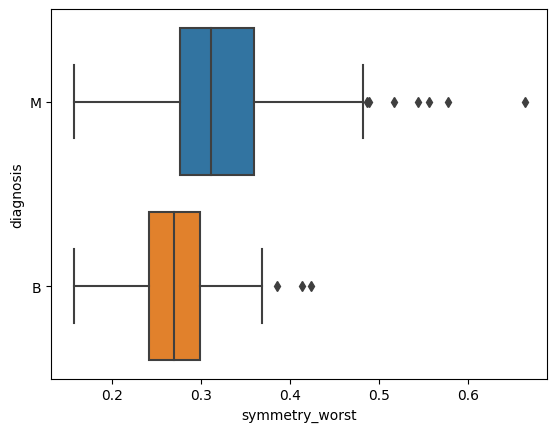

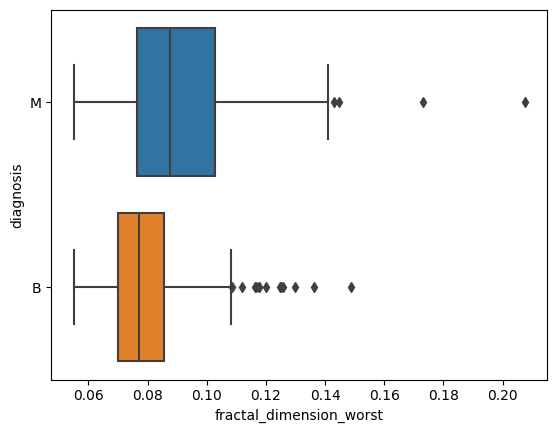

In [10]:

for col in df_X.columns:

   
    sns.boxplot(data = df_X, x = col,y= df_y)
    plt.show()

We can see that some features have high number of outliers

## XY relationship

<AxesSubplot: xlabel='radius_mean', ylabel='texture_mean'>

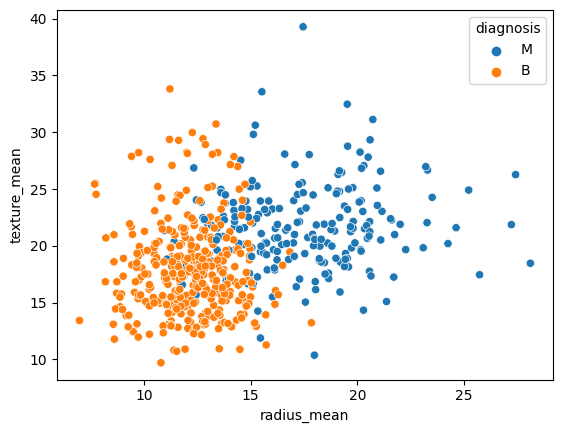

In [11]:
sns.scatterplot(data = df,x='radius_mean', y ='texture_mean'  ,hue="diagnosis")

<AxesSubplot: xlabel='area_worst', ylabel='texture_worst'>

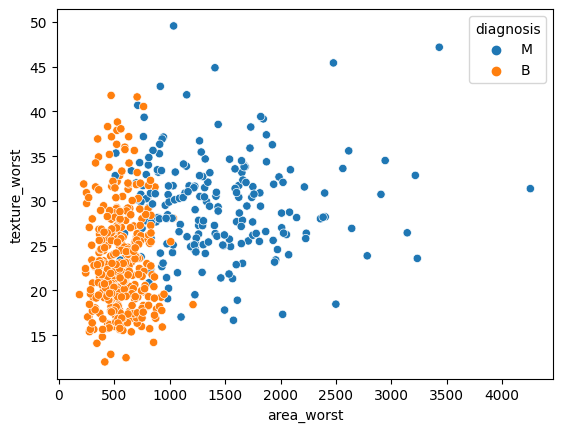

In [12]:
sns.scatterplot(data = df,x='area_worst', y ='texture_worst'  ,hue="diagnosis")

<AxesSubplot: xlabel='compactness_mean', ylabel='concavity_mean'>

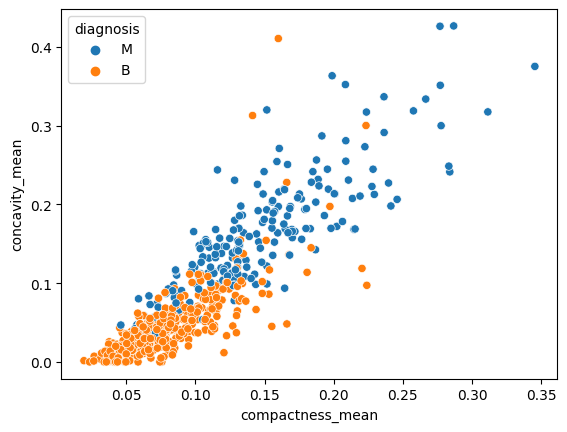

In [13]:
sns.scatterplot(data = df,x='compactness_mean', y ='concavity_mean'  ,hue="diagnosis")

This scatter plot shows a clear relationship between the compactness and the concavity mean

<AxesSubplot: xlabel='compactness_mean', ylabel='smoothness_mean'>

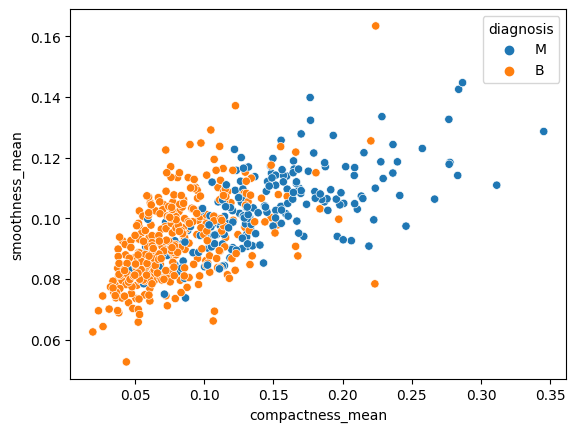

In [14]:
sns.scatterplot(data = df,x='compactness_mean', y ='smoothness_mean' ,hue="diagnosis")

In [15]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

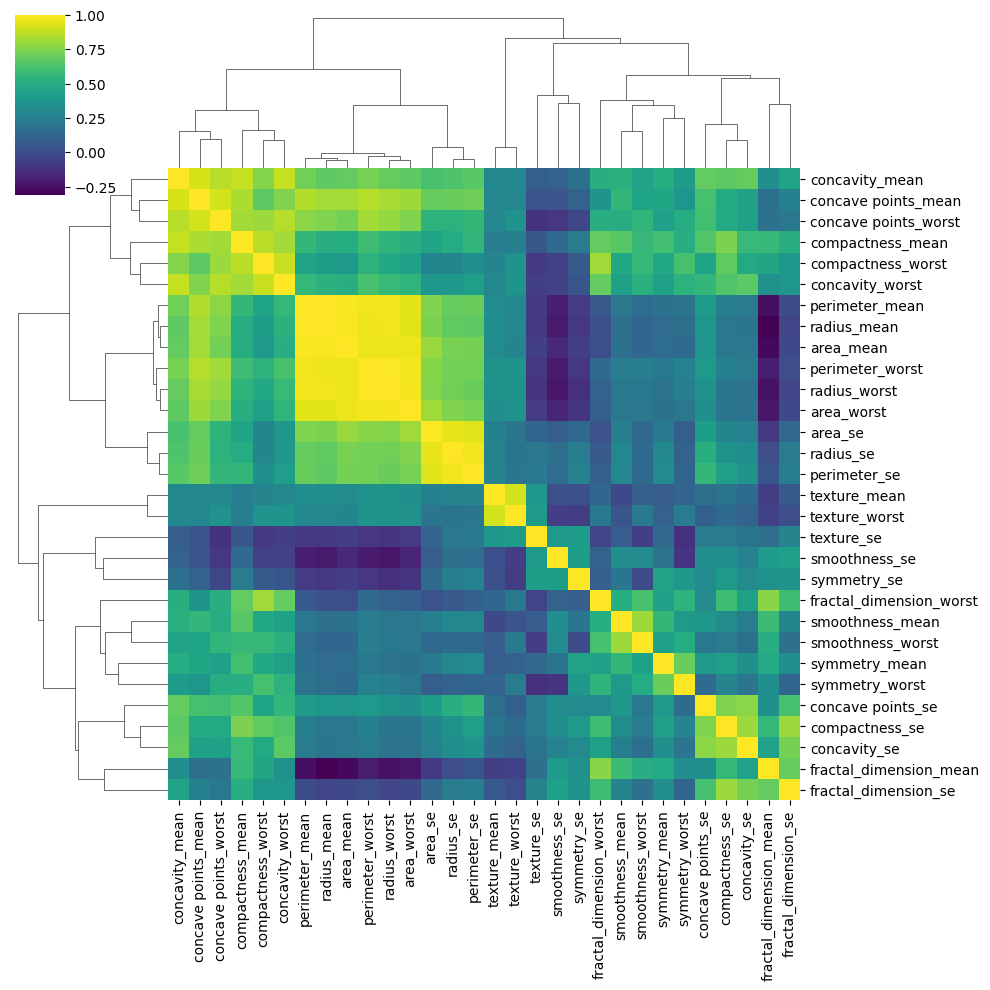

In [16]:
sns.clustermap(df_X.corr(),cmap='viridis')

We clearly see that a lot of the features can be grouped together.

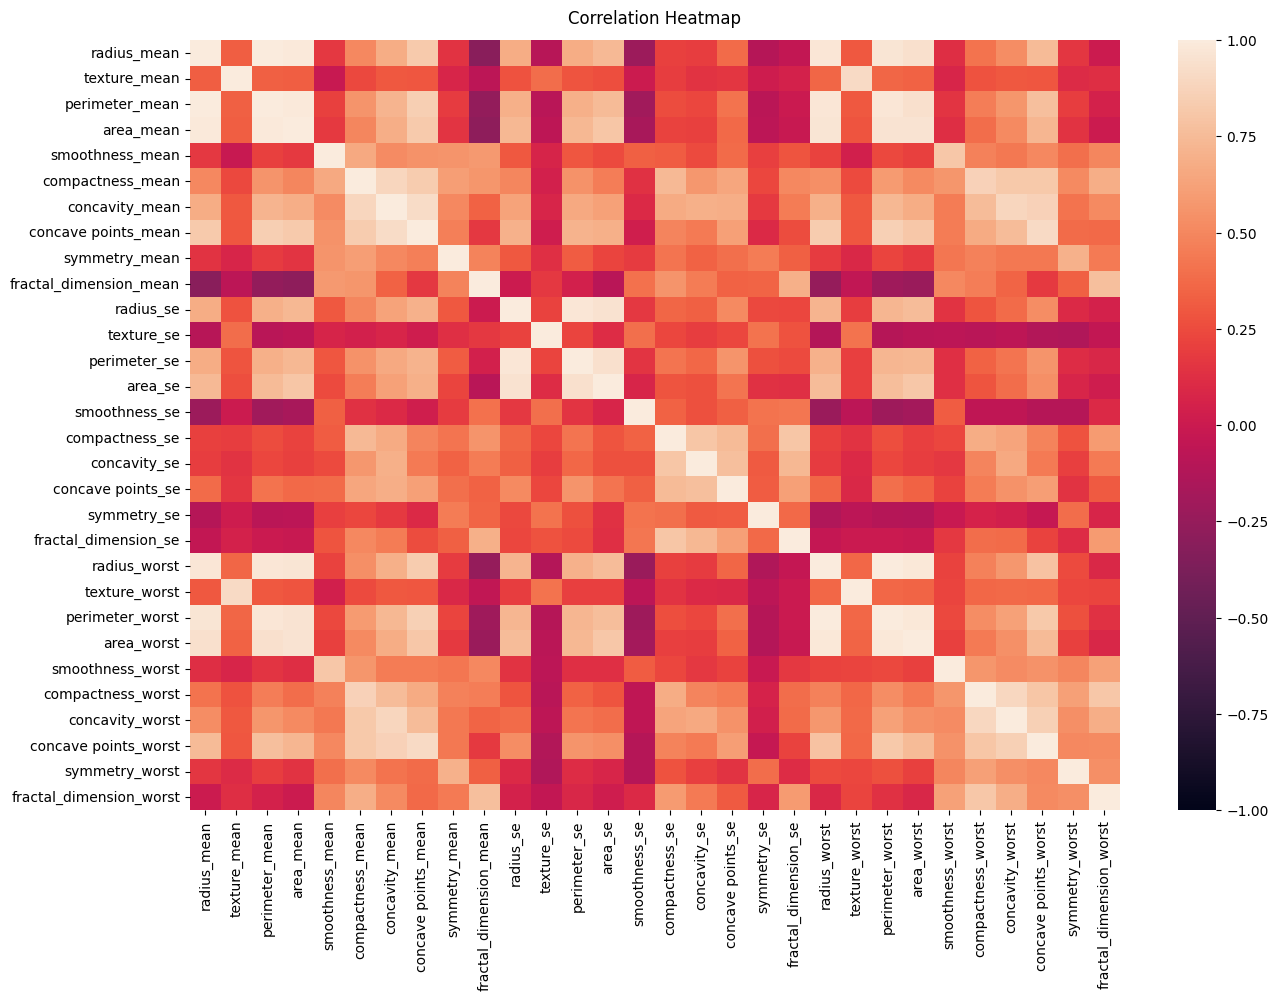

In [17]:
df_X_corr = df_X.corr()
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(data = df_X_corr,vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [18]:
corr_pair = []
for i in range(1,df_X_corr.shape[0]):
    for j in range(i+1,df_X_corr.shape[1]):
        if abs(df_X_corr.iloc[i,j]) >= 0.95:
            pair = []
            pair.append(df_X_corr.columns[i])
            pair.append(df_X_corr.columns[j])
            corr_pair.append(pair)
            
print(corr_pair)

[['perimeter_mean', 'area_mean'], ['perimeter_mean', 'radius_worst'], ['perimeter_mean', 'perimeter_worst'], ['area_mean', 'radius_worst'], ['area_mean', 'perimeter_worst'], ['area_mean', 'area_worst'], ['radius_se', 'perimeter_se'], ['radius_se', 'area_se'], ['radius_worst', 'perimeter_worst'], ['radius_worst', 'area_worst'], ['perimeter_worst', 'area_worst']]


In [19]:
feature_to_drop = ['perimeter_mean','area_mean','radius_se','radius_worst','perimeter_worst']
df_X_new = df_X.drop(columns=feature_to_drop)

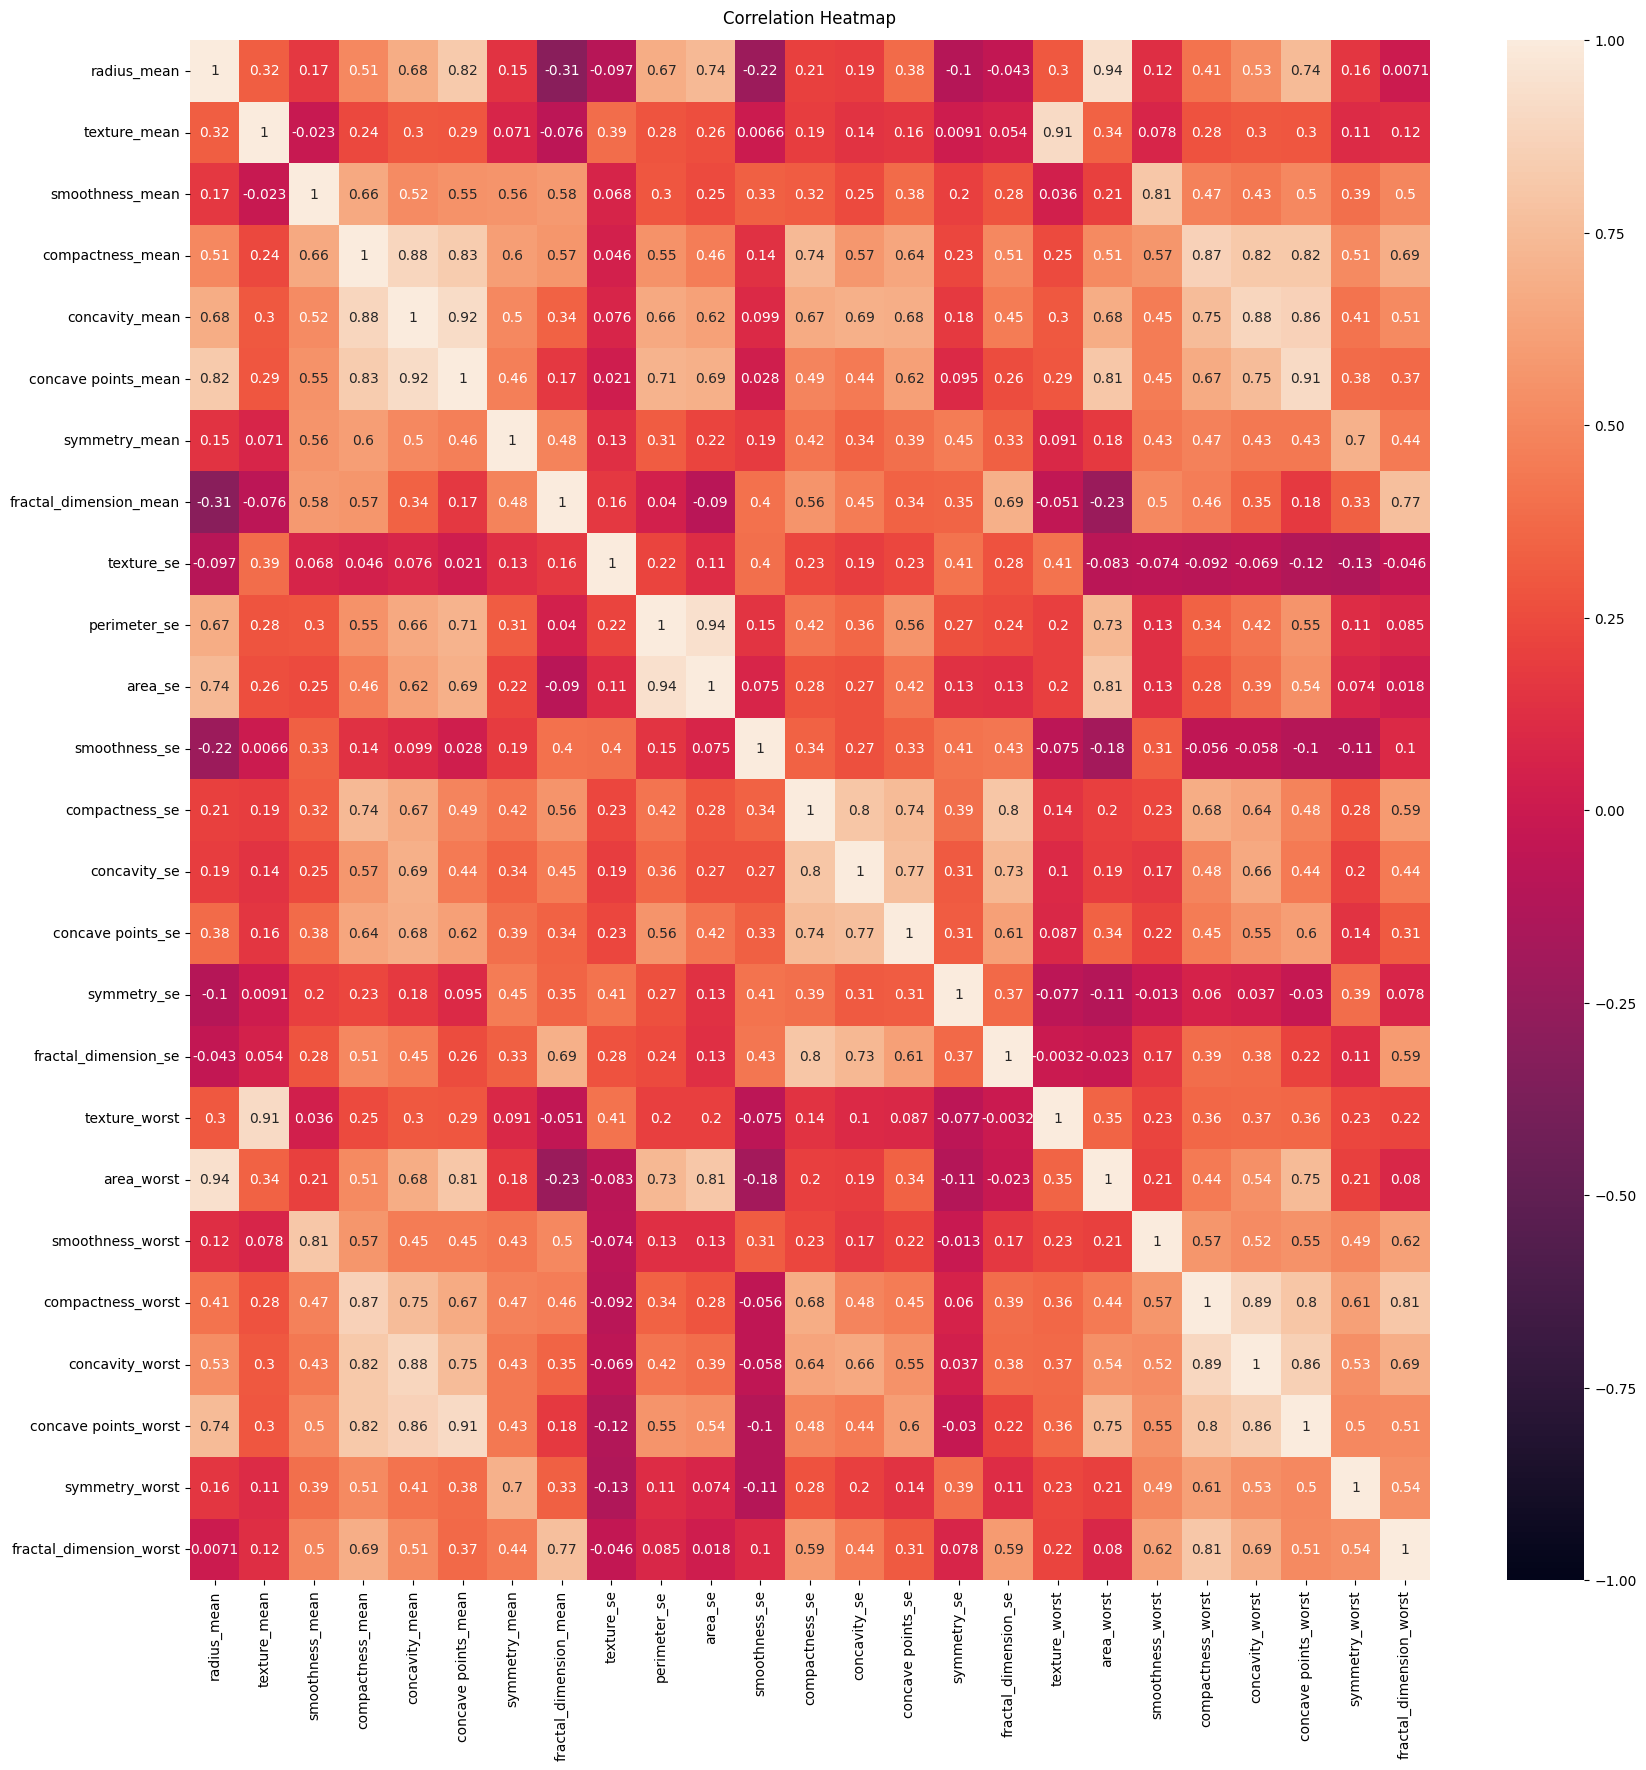

In [20]:
df_X_new_corr = df_X_new.corr()
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(data = df_X_new_corr,vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [21]:
df_y_new = df_y.replace({'M':1,'B':0})

## Here is the data set after preprocessing

In [22]:
print(df_X_new.head())
print(df_y_new.head())

   radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   texture_se  perimeter_se  ...  symmetry_se  fractal_dimension_se  \
0      0.9053         8.589  ...      0

In [23]:
df_X_new.to_pickle('./X.pkl')
df_y_new.to_pickle('./y.pkl')